In [8]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

import torch
from torchvision import datasets, transforms

In [9]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Resize(128), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
batch_size = 16

In [10]:
train_dataset = datasets.ImageFolder('./train_medium/', transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

In [60]:
val_dataset = datasets.ImageFolder('./val_medium/', transform=transform)
val_loader = torch.utils.data.DataLoader(val_dataset,)

classes = ('footway', 'primary')

375


In [19]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()

        # 3 input image channel, 6 output channels, 5x5 square convolution

        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 29 * 29, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 42)
        self.fc4 = nn.Linear(42, 2)        

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))        
        x = self.fc4(x)
        return x

net = Net()

In [20]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [21]:
loss_values = []
type(loss_values)

accuracy = []
type(accuracy)

loss_values.append(1)
accuracy.append(1)

In [22]:
def double_check_accuracy():
    
    running_loss = 0.0
    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for data in val_loader:
            images, labels = data
            
            # calculate outputs by running images through the network            
            outputs = net(images)            
            loss = criterion(outputs, labels)

            # print statistics
            running_loss += loss.item() 
            

    accuracy.append(running_loss / len(val_loader))

    print(f'Loss on the validation set { running_loss / len(val_dataset) } %')

for epoch in range(15):  # loop over the dataset multiple times

    running_loss = 0.0
    print(len(train_loader))
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()        
        if i % 20 == 19:    # print every 2000 mini-batches            
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 20:.3f}')
            running_loss = 0.0

    loss_values.append(running_loss / 20)
    double_check_accuracy()    

print('Finished Training')

251
[1,    20] loss: 0.704
[1,    40] loss: 0.703
[1,    60] loss: 0.698
[1,    80] loss: 0.692
[1,   100] loss: 0.700
[1,   120] loss: 0.693
[1,   140] loss: 0.691
[1,   160] loss: 0.696
[1,   180] loss: 0.692
[1,   200] loss: 0.692
[1,   220] loss: 0.693
[1,   240] loss: 0.691
Loss on the validation set 0.04564037815729777 %
251
[2,    20] loss: 0.692
[2,    40] loss: 0.694
[2,    60] loss: 0.692
[2,    80] loss: 0.690
[2,   100] loss: 0.692
[2,   120] loss: 0.693
[2,   140] loss: 0.692
[2,   160] loss: 0.689
[2,   180] loss: 0.690
[2,   200] loss: 0.693
[2,   220] loss: 0.691
[2,   240] loss: 0.691
Loss on the validation set 0.04394172827402751 %
251
[3,    20] loss: 0.689
[3,    40] loss: 0.690
[3,    60] loss: 0.689
[3,    80] loss: 0.688
[3,   100] loss: 0.688
[3,   120] loss: 0.685
[3,   140] loss: 0.685
[3,   160] loss: 0.687
[3,   180] loss: 0.683
[3,   200] loss: 0.688
[3,   220] loss: 0.687
[3,   240] loss: 0.683
Loss on the validation set 0.04317329343159994 %
251
[4,    20

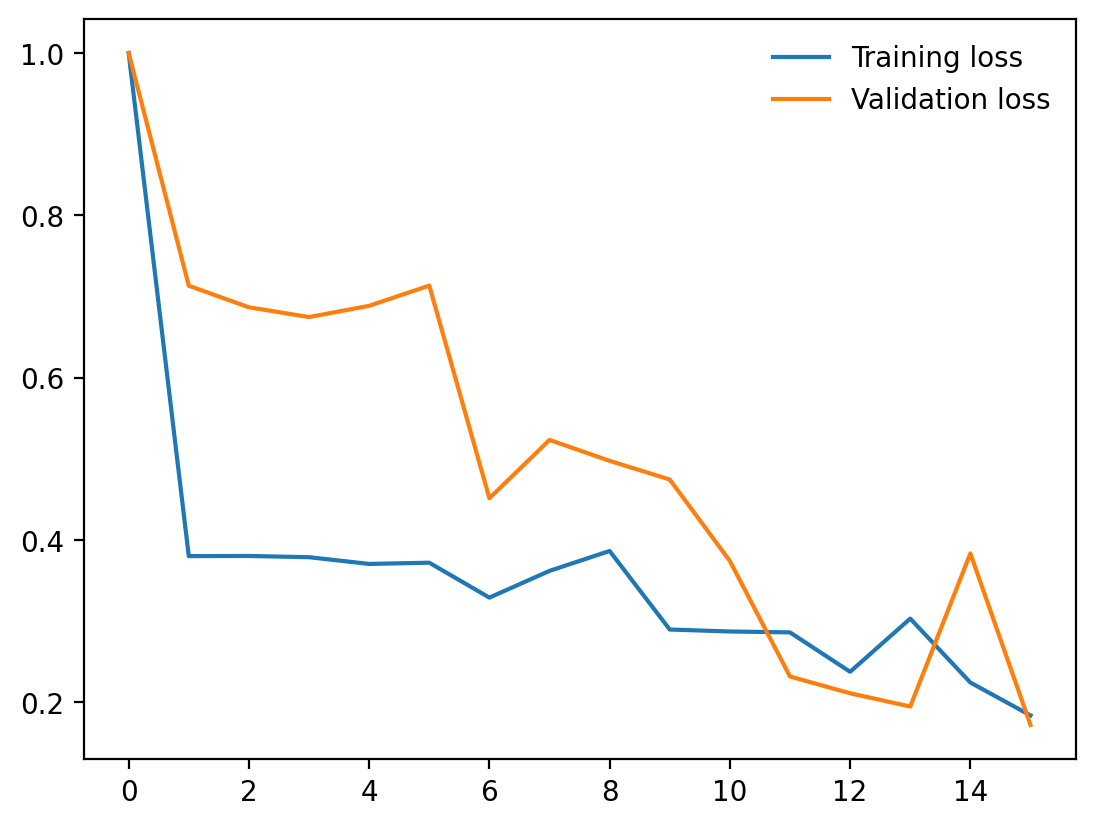

In [23]:
# plot the loss and accuracy and the validation loss and accuracy
plt.plot(loss_values, label='Training loss')
plt.plot(accuracy, label='Validation loss')
plt.legend(frameon=False)

plt.show()

In [24]:
PATH = './test_4_new_network.pth'
torch.save(net.state_dict(), PATH)

In [46]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    print("a", img.shape)
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [61]:
print(len(val_loader))

375


375
a torch.Size([3, 128, 128])


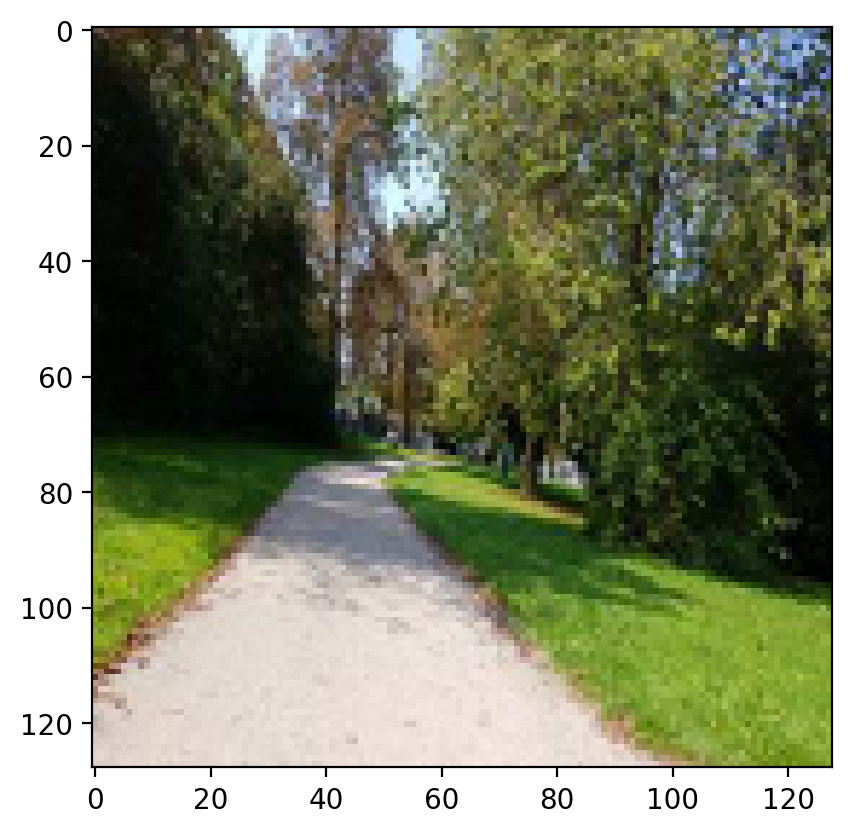

IndexError: index 1 is out of bounds for dimension 0 with size 1

In [64]:
dataiter = iter(val_loader)

for x in next(dataiter):
    images, labels = x
    print(images.shape)
    imshow(torchvision.utils.make_grid(images))
    break

images, labels = next(dataiter)

print(len(dataiter))

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [48]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [49]:
outputs = net(images)

a torch.Size([3, 262, 1042])


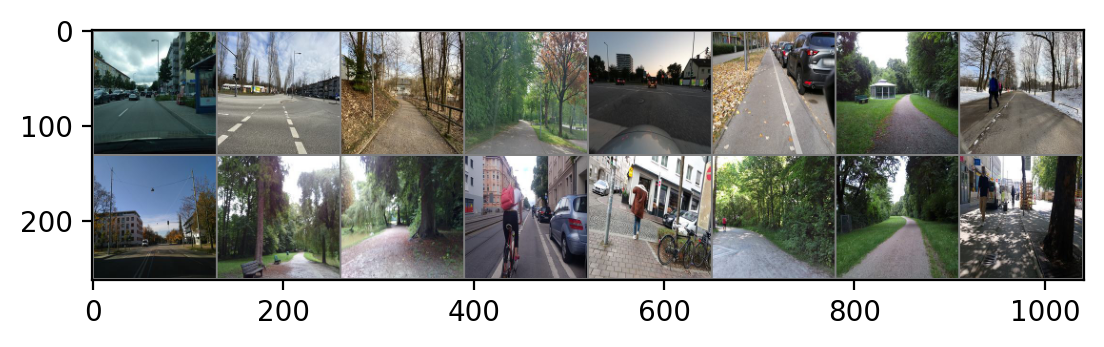

GroundTruth:  primary footway footway footway primary footway footway footway primary footway footway footway footway footway footway footway
Predicted:  primary footway footway footway primary footway footway footway primary footway footway footway footway footway footway footway


In [50]:
_, predicted = torch.max(outputs, 1)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))
print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(batch_size)))

In [66]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    count = 0
    for data in val_loader:        
        count += 1
        print(count)
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the test images: {100 * correct // total} %')

[tensor([[[[-0.3235, -0.2235, -0.4608,  ..., -0.1725, -0.3333, -0.6275],
          [-0.6961, -0.5255, -0.3078,  ..., -0.4824, -0.8647, -0.7804],
          [-0.7176, -0.7510, -0.7353,  ...,  0.2039, -0.4373, -0.5569],
          ...,
          [ 0.7588,  0.8020,  0.7608,  ...,  0.0529,  0.0941,  0.0216],
          [ 0.7843,  0.8000,  0.7431,  ...,  0.0549,  0.0137,  0.1098],
          [ 0.7255,  0.7020,  0.7314,  ..., -0.0804, -0.0667,  0.0608]],

         [[-0.4098, -0.3314, -0.5980,  ..., -0.0392, -0.2294, -0.5373],
          [-0.7529, -0.6020, -0.4157,  ..., -0.3078, -0.7451, -0.6392],
          [-0.7196, -0.7725, -0.7863,  ...,  0.3882, -0.2725, -0.4000],
          ...,
          [ 0.6569,  0.7000,  0.6588,  ...,  0.2882,  0.3275,  0.2510],
          [ 0.6824,  0.6980,  0.6412,  ...,  0.2902,  0.2451,  0.3373],
          [ 0.6235,  0.6000,  0.6294,  ...,  0.1549,  0.1608,  0.2882]],

         [[-0.4725, -0.3941, -0.6686,  ...,  0.2745, -0.0569, -0.4941],
          [-0.8255, -0.6804, 

In [41]:
issues_dataset = datasets.ImageFolder('./issues_medium/', transform=transform)

In [42]:
train_loader = torch.utils.data.DataLoader(issues_dataset, batch_size=batch_size, shuffle=True)

dataiter = iter(train_loader)
images, labels = next(dataiter)

outputs = net(images)

correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in train_loader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the test images: {100 * correct // total} %')

Accuracy of the network on the test images: 86 %
